This notebook is a demo of using a simulation with multiple actions when using an additive model. (Interlinked)

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy
from adaptive_nof1.models import Model, CombinedModel
from adaptive_nof1.basic_types import Outcome

RED_PILL = 1
BLUE_PILL = 2


class InterlinkedPillModel(Model):
    def __init__(self, patient_id):
        self.rng = numpy.random.default_rng(patient_id)
        self.red_pill_slope = self.rng.normal(0, 0.1)
        self.patient_id = patient_id

    def generate_context(self, history):
        return {
            "time_of_the_day": numpy.sin(len(history) / 24 / 3),
            "other_context_variable": self.rng.normal(0, 1),
        }

    def observe_outcome(self, action, context):
        return {
            "outcome": action["type_of_pill"] * context["time_of_the_day"]
            + action["dose"]
        }

    def __str__(self):
        return f"InterlinkedPillModel"

## With the data generating model set, we can now set up a simulation study.
Let's say we want to compare the performance between a fixed allocation of red and blue pills and an epsilon-greedy bandit approach.

Let's first define some constants.


In [24]:
# Simulation constants
data_generating_model = lambda patient_id: InterlinkedPillModel(patient_id)

length = 400
number_of_patients = 1

Now, we create two series of simulations objects. We can use predefined policies.

In [25]:
from adaptive_nof1 import SeriesOfSimulationsRunner
from adaptive_nof1.policies import (
    FixedPolicy,
    FrequentistEpsilonGreedy,
    CombinedPolicy,
    FrequentistExploreThenCommit,
    ThompsonSampling,
    CrossoverPolicy,
)

from adaptive_nof1.inference import InterlinkedAdditiveModel

treatment_names = ["type_of_pill", "dose"]
number_of_actions = [3, 4]

fixed_schedule_series_runner = SeriesOfSimulationsRunner(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=CrossoverPolicy(
        policy=FixedPolicy(
            number_of_actions=12,
        ),
        action_dimensions=number_of_actions,
        action_names=treatment_names,
    ),
)
fixed_schedule_series = fixed_schedule_series_runner.simulate(length)


adaptive_series_runner = SeriesOfSimulationsRunner(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=CrossoverPolicy(
        policy=ThompsonSampling(
            inference_model=InterlinkedAdditiveModel(
                coefficient_names_per_treatment=[
                    ["time_of_the_day", "other_context_variable"],
                    ["time_of_the_day"],
                ],
                action_dimensions=number_of_actions,
                action_names=treatment_names,
            ),
            number_of_actions=12,
            posterior_update_interval=100,
        ),
        action_dimensions=number_of_actions,
        action_names=treatment_names,
    ),
)
adaptive_series = adaptive_series_runner.simulate(length)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose, slopes_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose, slopes_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7 seconds.
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose, slopes_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose, slopes_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


# The framework provides different plots to test the performance. One simple one is the regret over time graph:

In [ ]:
from adaptive_nof1.metrics import SimpleRegret

SeriesOfSimulationsData.plot_lines(
    [fixed_schedule_series, adaptive_series], [SimpleRegret(outcome_name="outcome")]
)

In [ ]:
SeriesOfSimulationsData.plot_bar(
    [fixed_schedule_series, adaptive_series],
    [SimpleRegret(outcome_name="outcome")],
)

Additionally, one can look at each individual assignment:
If you hover over this graphic, you get detailed information about the assignment, including the counterfactual outcomes if another action would have been chosen.
Try it out yourself!

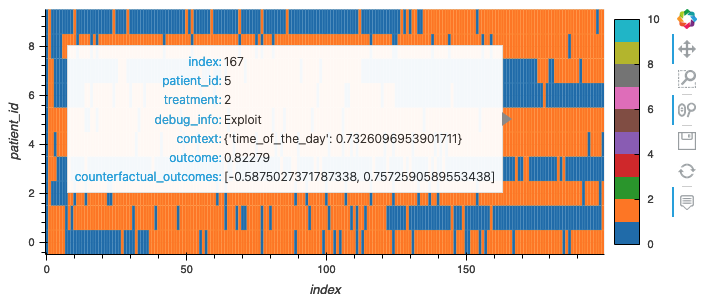

In [160]:
fixed_schedule_series.plot_allocations(treatment_name="type_of_pill")

:HeatMap   [index,patient_id]   (type_of_pill,debug_info,context,outcome,counterfactual_outcomes,type_of_pill)

In [161]:
adaptive_series.plot_allocations(treatment_name="dose")

:HeatMap   [index,patient_id]   (dose,debug_info,context,outcome,counterfactual_outcomes,dose)